# **Logistic Regression (for Binary Classification Problems)**

### `Goal`: predict a categorical output (e.g., 0 or 1, Yes or No, Spam or Not Spam ).Despite "regression" in its name, it's classification algorithm

**`Mathematical Idea:`** It uses a sigmoid (logistic) function to map any real-valued input into a value between 0 and 1, which can be interpreted as a probability.
The sigmoid function is: $
\sigma(z) = \frac{1}{1 + e^{-z}}
$

Where $z$ is a linear combination of input features: $z = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n$

Instead of directly minimizing squared errors, Logistic Regression uses a **cost function called log-loss (or cross-entropy loss)** and optimizes it using an iterative optimization algorithm like **Gradient Descent**.

**Gradient Descent (Simplified):**

1. Start with random β values.

2. Calculate the cost.

3. Calculate the gradient (direction of steepest ascent) of the cost function with respect to each β.

4. Update β values by moving in the opposite direction of the gradient (downhill) by a small step size (learning rate).

5. Repeat until the cost converges or a maximum number of iterations is reached.

**Logistic Regression with `scikit-learn`**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# 1. Genearate Sample data (for classification)
np.random.seed(0)
# Class 0 data
X0 = np.random.multivariate_normal(mean=[0,0], cov=[[1, 0.5], [0.5, 1]], size=50)
y0 = np.zeros(50)
# Class 1 data
X1 = np.random.multivariate_normal(mean=[3,3], cov=[[1, 0.5], [0.5, 1]], size=50)
y1 = np.ones(50)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

print(X[:5])
print()
print(y[:5])

[[-1.72779275 -1.32763554]
 [-1.96805856  0.27283464]
 [-1.12871372 -2.1059916 ]
 [-0.7471221  -0.89847931]
 [-0.1159091   0.2946894 ]]

[0. 0. 0. 0. 0.]


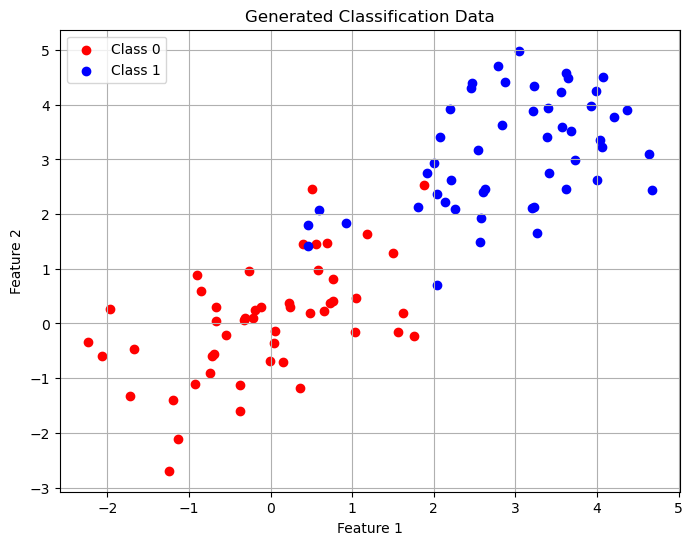

In [5]:
# visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y== 0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y== 1, 0], X[y==1, 1], color='blue', label='Class 1')
plt.title('Generated Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
# scale features (important for Gradient Descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Instantiate and train the model
# 'solver' specifies the algorithm to use for optimization
# 'liblinear' is good for small datasets and L1/L2 regularization
model_lr_sklearn = LogisticRegression(solver='liblinear', random_state=42)
model_lr_sklearn.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [10]:
# Make predictions
y_pred_lr_sklearn = model_lr_sklearn.predict(X_test_scaled)
print(y_pred_lr_sklearn[:5])

[1. 1. 1. 0. 0.]


In [11]:
# Evaluate the model
accuracy_sklearn = accuracy_score(y_test, y_pred_lr_sklearn)
print(f"Accuracy of Logistic Regression model: {accuracy_sklearn:.2f}")
print(f"confusion_matrix:\n {confusion_matrix(y_test, y_pred_lr_sklearn)}")
print(f"classification_report:\n {classification_report(y_test, y_pred_lr_sklearn)}")

Accuracy of Logistic Regression model: 0.90
confusion_matrix:
 [[10  2]
 [ 0  8]]
classification_report:
               precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        12
         1.0       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



In [12]:
# plotting decision boundary (for 2 features)
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0', edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

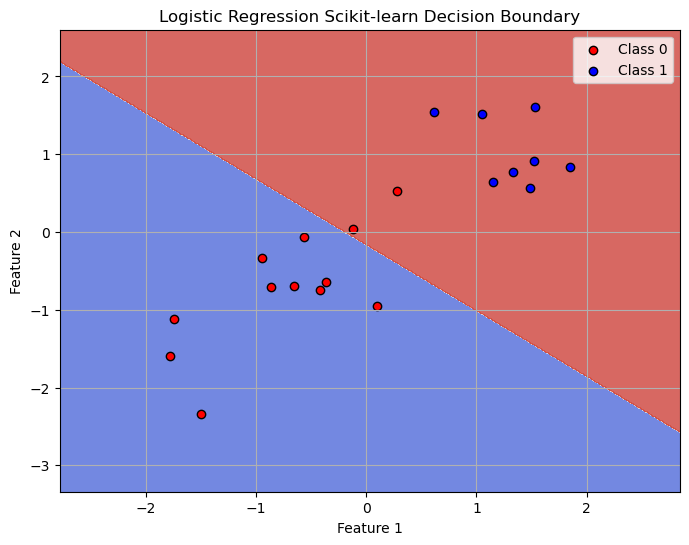

In [13]:
# plotting decision boundary
plot_decision_boundary(X_test_scaled, y_test, model_lr_sklearn, 'Logistic Regression Scikit-learn Decision Boundary')